![](http://thecads.org/wp-content/uploads/2017/02/adax_logo.jpg)
# Module 4.1: Regularization & More

In this module, we look at the concept of regularization in machine learning, and how it helps to reduce overfitting in models in order that generalization performance can be improved. We will also explore grid search which is a helpful technique of going over a number of hyperparameters including regularization parameters in order to find the model with the best set of parameters. Grid search with cross validation is a useful and practical technique that ML practitioners should know well. 

## Regularization

A good way of reducing overfitting is to *regularize* the model. This basically mean, we would like to "constrain" it: Imagine, reducing its degrees of freedom so that it would be harder to overfit the data. Some people think of this as making the model "less precise" so as to make it cater to a wider range of possibilities. For instance, a simple way of regularizing a polynomial model is to reduce the number of polynomial degrees. You can simply retrain a model with a lower number of polynomial degrees, but regularization is not the same -- it maintains the same model that was chosen, but control it further by a *regularization term*. In other words, the objective function of the algorithm consists of the loss function added with a regularization term to constrain the model by *penalizing the magnitude of coefficient of features (or the weights)*. 

We start of by looking at regularized linear models. Regularization can be used in all linear methods, including both regression and classification. The only difference is in their loss functions.

### Regularized Linear Models

We will now look at the case of regression with Ridge Regression and Lasso Regression, before extending the same concept to the classification methods. The key difference between the two (Ridge and Lasso) is in the way they assign the 'penalty' to the coefficients.

### A. Ridge Regression

Ridge regression is also a linear model for regression, so it is formulated using ordinary least squares error (or sum of squared error) as the cost function, plus a regularization term equal to $\alpha\sum_{i=1}^{d}w_{i}^2$. This is also known as an "$\ell$-2 regularization", in layman terms, it adds penalty equivalent to the square of the magnitude of coefficients. Basically, think of the objective function as one that is: Least Squares cost function + $\alpha$ * (sum of square of coefficients). 

Let's look at an example.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
boston = datasets.load_boston()

# Ex1: working the Boston data by scaling and adding polynomial features
# use MinMaxScaler() function to on the boston data
# add PolynomialFeatures to degree 2 to the data
# create the X and y using the data and target

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
# done intentionally: extending the Boston data 
# by adding polynomial features

X = MinMaxScaler().fit_transform(boston.data)
print(X.shape)

(506, 13)


In [6]:
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
y = boston.target
print(X.shape)
print(y.shape)

(506, 104)
(506,)


In [7]:
print(X)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 8.04248656e-03]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 4.18080621e-02]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.79579831e-01
  6.28144504e-02 4.02790570e-03]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 1.16406475e-02]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.82676920e-01
  1.29930407e-01 1.71795127e-02]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 2.87987643e-02]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [9]:
print(boston.data[:,2])

[ 2.31  7.07  7.07  2.18  2.18  2.18  7.87  7.87  7.87  7.87  7.87  7.87
  7.87  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14
  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  8.14  5.96
  5.96  5.96  5.96  2.95  2.95  6.91  6.91  6.91  6.91  6.91  6.91  6.91
  6.91  6.91  5.64  5.64  5.64  5.64  4.    1.22  0.74  1.32  5.13  5.13
  5.13  5.13  5.13  5.13  1.38  3.37  3.37  6.07  6.07  6.07 10.81 10.81
 10.81 10.81 12.83 12.83 12.83 12.83 12.83 12.83  4.86  4.86  4.86  4.86
  4.49  4.49  4.49  4.49  3.41  3.41  3.41  3.41 15.04 15.04 15.04  2.89
  2.89  2.89  2.89  2.89  8.56  8.56  8.56  8.56  8.56  8.56  8.56  8.56
  8.56  8.56  8.56 10.01 10.01 10.01 10.01 10.01 10.01 10.01 10.01 10.01
 25.65 25.65 25.65 25.65 25.65 25.65 25.65 21.89 21.89 21.89 21.89 21.89
 21.89 21.89 21.89 21.89 21.89 21.89 21.89 21.89 21.89 21.89 19.58 19.58
 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58
 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19.58 19

When comparing training set and test set scores, we find that we predict very accurately for the training set, but the $R^{2}$ on the test set is much worse. This is a common problem of high *variance* models: They overfit too tightly on the training data, hence do not generalize well to the test data. We should try to find a model that allows us to control its complexity. One of the most commonly used alternatives to standard linear regression is **ridge regression**.

Let's plot the coefficient magnitudes for the linear regression method:

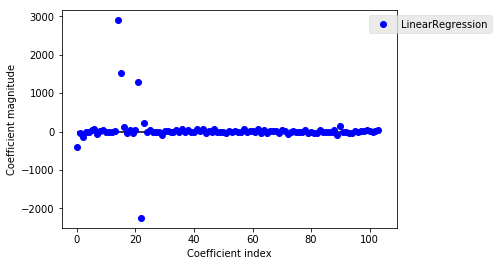

In [10]:
plt.plot(lr.coef_, 'bo', label="LinearRegression")
plt.style.use('ggplot')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
#plt.ylim(-25, 25)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')

In [11]:
print("Minimum COEF={0}\nMaximum COEF={1}".format(min(lr.coef_),max(lr.coef_)))

Minimum COEF=-2246.003057593477
Maximum COEF=2895.0539118819393


These coefficient magnitudes tell us one thing: The higher their magnitudes (positive or negative regardless), the more likely they are to overfit the data tightly, going thru every single point in the data. Use this simple example for intuition: Let's say we have a function of equation $y = a_1x_1 + a_2x_2 + a_3x_3$, we will have a nice cubic function if all coefficients $a_1$, $a_2$ and $a_3$ are all big numbers. However, if we make some of these coefficients as close as possible to zero, or even zero, the complexity of the function decreases. If $a_1=2, a_2=1$ and $a_3=0$, the function becomes a quadratic line. Hence, we can say each feature has little effect on the outcome when the function slopes are small. This is how regularization works.

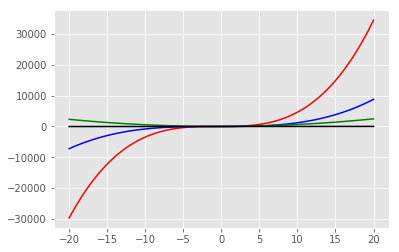

In [12]:
a = [[4,6,4], [1,2,1], [4,6,0], [1,0,0]]  #coefficients
x = np.linspace(-20, 20, 100)
plotstyle = ['r-', 'b-', 'g-', 'k-']
for p in range(0, 4):
    y = a[p][0]*x + a[p][1]*x**2 + a[p][2]*x**3    # function
    plt.plot(x, y, plotstyle[p])
plt.show()

Ok, let's get ridge regression working

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Here, we see that the test set is already improving (earlier was 0.61), but at the expense of a lower training accuracy as well. A less complex model means training set will not fit ideally, but generalization performance is much better now. 

How much importance the model places on simplicity versus training set performance can be controlled by the `alpha` parameter.
The `alpha` regularization parameter (in some other references, $\lambda$ is used) controls a trade off between our two goals: 1) to fit the training set well, 2) to coefficients small

`alpha` defaults to 1.0 in this function, but it can be a few orders of magnitude smaller (like 0.01) or bigger (like 1000). The optimum setting of `alpha` depends on the particular dataset you are using. Try a few different alpha values...

In [14]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("alpha: 0.01")
print("Training set score: {:.2f}".format(ridge001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge001.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("\nalpha: 0.1")
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

ridge05 = Ridge(alpha=0.5).fit(X_train, y_train)
print("\nalpha: 0.5")
print("Training set score: {:.2f}".format(ridge05.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge05.score(X_test, y_test)))

ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("\nalpha: 1")
print("Training set score: {:.2f}".format(ridge1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge1.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("\nalpha: 10")
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

alpha: 0.01
Training set score: 0.94
Test set score: 0.70

alpha: 0.1
Training set score: 0.93
Test set score: 0.77

alpha: 0.5
Training set score: 0.90
Test set score: 0.77

alpha: 1
Training set score: 0.89
Test set score: 0.75

alpha: 10
Training set score: 0.79
Test set score: 0.64


We can get some qualitative insights into the coefficients, by checking out the spread of coefficient values for the different alpha settings for ridge regression, and also linear regression. We expect higher `alpha` values to create a more restricted and "regularized" model, so we expect the coefficients to be very close to zero. 

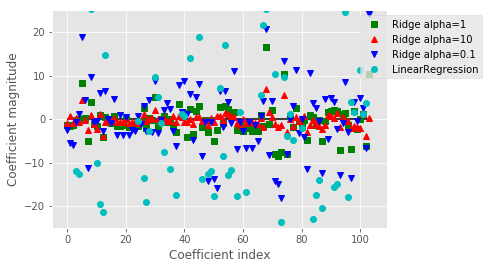

In [15]:
plt.plot(ridge.coef_, 'gs', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'r^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'bv', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'co', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

Another plot that could interest us in finding out what's the best `alpha` value is to plot a graph of accuracy (of training and test sets) as a function of the `alpha` value. To give you a hint of what `alpha` values are appropriate to be used, try using numbers in orders of magnitude. A log10 scale is needed on the horizontal axis.

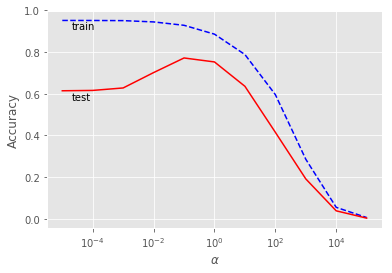

In [16]:
alpha = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
train_acc = []
test_acc = []
for a in range(0, len(alpha)):
    ridge_reg = Ridge(alpha=10**alpha[a]).fit(X_train, y_train)
    train_acc.append(ridge_reg.score(X_train, y_train))
    test_acc.append(ridge_reg.score(X_test, y_test))
plt.semilogx([10**a for a in alpha], train_acc, 'b--')
plt.semilogx([10**a for a in alpha], test_acc, 'r-')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.text(0.00002, 0.91, 'train')  # annotate some text
plt.text(0.00002, 0.57, 'test')   # annotate some text
plt.show()

What does this plot tell us?

**Q1**: Another way of understanding the influence of regularization on a ML model is to fix the value of `alpha` but vary the amount of training data available. This kind of plot, also known as a *learning curve*, tells us how the model perform as a function of the dataset size. It helps us understand the scalability of your model, and also to check on bias/variance errors.  

In [17]:
sizes = np.arange(0.1,1.0,0.1)
train_acc1 = []
test_acc1 = []
y = boston.target
for n in sizes:
#    print("\nThe n value is: ", n)
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = n, 
                                                        random_state=42)
    ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
    train_acc1.append(ridge01.score(X_train, y_train))
    test_acc1.append(ridge01.score(X_test, y_test))
#     print("The training size is: ", n)
#     print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
#     print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

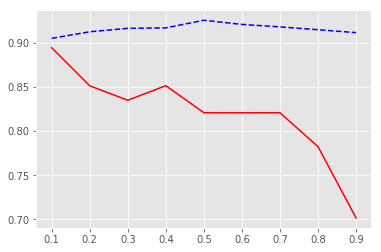

In [18]:
plt.plot(sizes, train_acc1, 'b--')
plt.plot(sizes, test_acc1, 'r-')

**Q2**: Use cross validation instead of training-test splits to get a better perspective of the model's performance vs. `alpha` parameter values. 

In [19]:
from sklearn.model_selection import cross_val_score

model = Ridge(alpha=18)
scores = cross_val_score(model, 
                         boston.data[0:200,:], 
                         boston.target[0:200], 
                         cv=3)   #3-fold!
scores

array([0.686244  , 0.62492624, 0.51782251])

### B. Lasso Regression

An alternative to the Ridge Regression is **Lasso Regression**. Likewise, this method also restricts coefficients to close to zero, but in a slightly different way, called L1-regularization (or "$\ell$-1 regularization" like how we denote earlier for Ridge Regression). The consequence of L1-regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model. 

In [20]:
from sklearn.linear_model import Lasso
print("\nThe original Number of features: ",X_train.shape[1])
lasso = Lasso(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


The original Number of features:  104
Training set score: 0.08
Test set score: 0.08
Number of features used: 1


But this looks like Lasso is doing quite badly on both training and test sets! This could mean that we are *underfitting*, and that only 1 features (out of 104) are non-zero and are contributing to the model. Similar to Ridge, Lasso also has a regularization parameter, `alpha`, that controls how strongly coefficients are pushed toward zero. In the previous example, we used the default of `alpha=1.0`. To reduce underfitting, let’s try decreasing `alpha`. When we do this, we also need to increase the default setting of `max_iter` (the maximum number of iterations to run).

In [21]:
lasso001 = Lasso(alpha=0.03, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.86
Test set score: 0.72
Number of features used: 16


A lower `alpha` allowed us to fit a more complex model, which works out quite well on the training and test data. The performance is slightly better than the Ridge in fact, and we are only using 16
out of the 104 features. If we set `alpha` too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to Linear Regression.

In [22]:
lasso00001 = Lasso(alpha=0.01, max_iter=1000000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.36
Number of features used: 25


**Q3**: To verify that L1-regularization indeed results in coefficients that are zero value, generate again the coefficient magnitude plot to see the spread of the coefficients with different `alpha` values. Try $\alpha=[1, 0.01, 0.0001]$. Observe closely the number of zero value coefficients for the different `alpha` values. You may also compare with Ridge Regression and Linear Regression.

Training set score: 0.08
Test set score: 0.08
Number of features used: 1


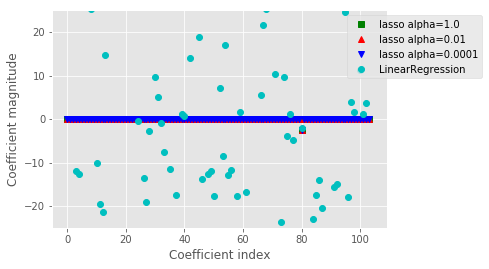

Training set score: 0.95
Test set score: 0.36
Number of features used: 25


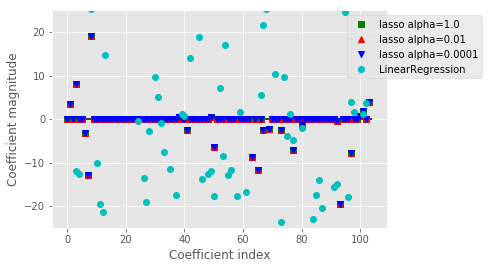

Training set score: 1.00
Test set score: -1.05
Number of features used: 45


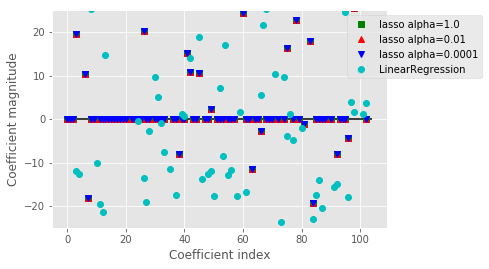

In [23]:
for alpha in (1.0, 0.01, 0.0001):
    lasso = Lasso(alpha, max_iter=1000000).fit(X_train, y_train)
    print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
    print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

    plt.plot(lasso.coef_, 'gs', label="lasso alpha=1.0")
    plt.plot(lasso.coef_, 'r^', label="lasso alpha=0.01")
    plt.plot(lasso.coef_, 'bv', label="lasso alpha=0.0001")
    plt.plot(lr.coef_, 'co', label="LinearRegression")
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.hlines(0, 0, len(lr.coef_))
    plt.ylim(-25, 25)
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
    plt.show()

**Practical tips**: In practice, ridge regression is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. scikit-learn also provides the *ElasticNet* class, which combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

### Revisiting Logistic Regression

Similar when we look at classification problems, a model that is overfitting the training data can also be regularized in the same way. The only difference between classification and regression tasks, is in the cost function. Both Logistic Regression and Support Vector Machines (SVM) models can apply an L2-regularization, in the same way how Ridge does for regression. 


#### The C parameter

For scikit-learn library's `LogisticRegression` and `LinearSVC`, the trade-off parameter that determines the strength of the regularization is called `C`. The higher `C` values correspond to less regularization (model tries to fit training set the best possible), while lower `C` values correspond to more regularization (model tries to find coefficient vector *w* that is close to zero). 

There is an interesting aspect to how the parameter `C` acts. Using low values of `C` will cause the algorithms to try to adjust to the "majority" of data points, while using a higher value of `C` stresses the importance that each individual data point be classified correctly. The following plots show what's happening:

![](resources/regularization-boundaries.png)

Here, keep in mind the data in its original distribution, and think of what should be the best boundary to split the classes. It is likely to be the space in between the upper and lower groups of data. Here, with `C=0.01`, the model regularizes a lot, choosing a relatively horizontal line (imagine: small slope, small coefficient values). A more balance option would be `C=1.0` which gives a good "buffer zone" between the two groups. We can say this gives a good tolerance margin for error. The final example of `C=100` changes the decision boundary a lot more; this time it still misclassifies one of the red points, but have got all blue points correct (training accuracy higher). This decision boundary is way too tight, and it will potentially cause a high test error if many new red points start falling to the blue side and vice versa. It does not capture the overall layout of the classes well.

In high dimensions, guarding against overfitting becomes increasingly important when more features are to be considered.

Let's analyse the Breast Cancer data using `LogisticRegression` with regularization:

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

logreg = LogisticRegression().fit(X_train, y_train) # The c is somewhere here. How to find?

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


Default value: `C=1` provides quite good performance already (lucky?). But as training and test set performance are very close, perhaps, there is potentil for the scores to be higher (therefore, we make some guess that it might be underfitting slightly still, bias is still high). We try increasing `C` to fit a more flexible model:

In [25]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


Ok, there's some increase now. Test set score is higher. Notice that variance error is creeping in (look at the gap between training and test scores, compared to that earlier). How about `C=0.01`...

In [26]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


In [27]:
logreg1000 = LogisticRegression(C=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


This is clearly underfitting, scores are all down.

Let's plot the coefficient magnitude plot again.

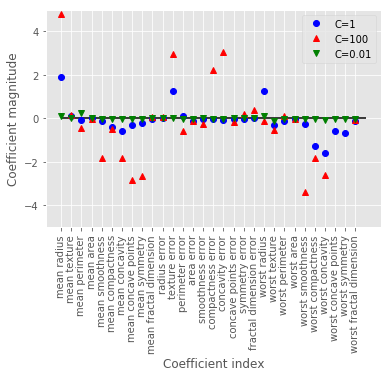

In [28]:
plt.plot(logreg.coef_.T, 'bo', label="C=1")
plt.plot(logreg100.coef_.T, 'r^', label="C=100")
plt.plot(logreg001.coef_.T, 'gv', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

If we desire a more interpretable model, using L1 regularization might help, as it limits
the model to using only a few features. Here is the coefficient plot and classification
accuracies for L1 regularization

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


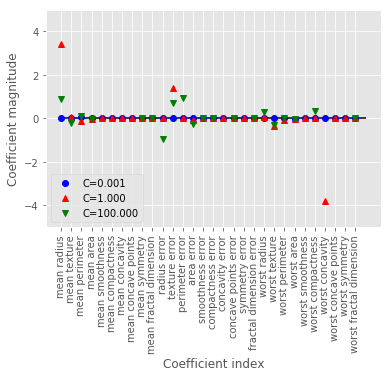

In [29]:
for C, marker in zip([0.001, 1, 100], ['bo', 'r^', 'gv']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

**Q4**: Using `SVC` (Support Vector Classifier), find suitable values for the regularization parameter `C`. 

In [30]:
#classification using SVC
from sklearn.svm import SVC# for each combination of parameters, train an SVC
svm = SVC(kernel='linear', C=0.1)
svm.fit(X_train, y_train)
# evaluate the SVC on the test set
score = svm.score(X_test, y_test)    
print("Score: {:.2f}".format(score))

Score: 0.96


### Extra: Early Stopping - After SVM

A very different way of regularizing iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*. This is where some form of "regularization" is done at the optimization algorithm end, instead of tuning hyperparameters.

Typically, as the iterations go on in Gradient Descent, the prediction error (or also known as the loss) on the training set naturally goes down, and so is the loss of the test set. However, after a while the test error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With early stopping, we can stop training as soon as the *test error reaches the minimum*. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a "beautiful free lunch". Basically, the problem with waiting it out (to the end of all iterations) is that it is likely that converging to zero (perfect) is almost impossible for most data out there. Why not stop earlier when the error is optimum? How do we know when the test error has reached its *minimum*?

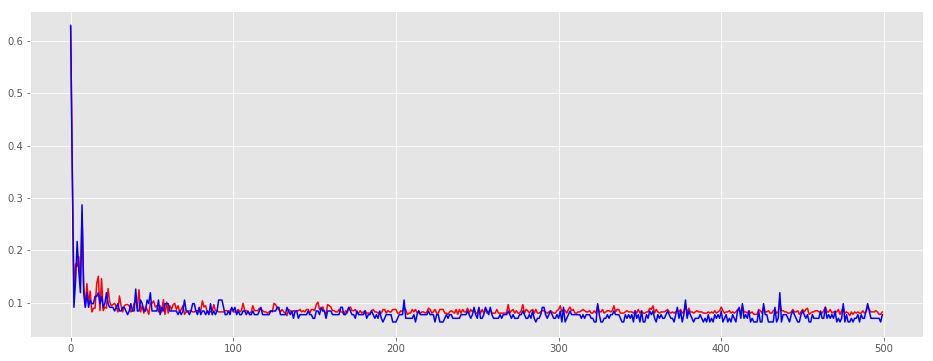

best epoch=192


In [31]:
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

sgd_reg = LogisticRegression(max_iter=1, warm_start=True, solver='sag')
minimum_test_error = float("inf")
best_epoch = None
best_model = None
test_error_all = []
train_error_all = []
for epoch in range(500):
    sgd_reg.fit(X_train, y_train) # continues where it left off
    y_train_predict = sgd_reg.predict(X_train)
    y_test_predict = sgd_reg.predict(X_test)
    train_error = mean_squared_error(y_train_predict, y_train)
    test_error = mean_squared_error(y_test_predict, y_test)
    train_error_all.append(train_error)
    test_error_all.append(test_error)
    if test_error < minimum_test_error:
        minimum_test_error = test_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

    # How to implement early stopping in this loop??


plt.figure(figsize=(16,6))
plt.plot(range(500), train_error_all, 'r-')
plt.plot(range(500), test_error_all, 'b-')
plt.show()
print("best epoch={}".format(best_epoch))

### Grid Search

Now we want to improve the model's generalization performance by tuning its parameters. Finding the values of the important parameters of a model (the ones that provide the best generalization performance) is a tricky task, but necessary for almost all models and datasets. Because it is such a common task, there are standard methods in scikit-learn to help you with it. The most commonly used method is grid search, which basically means trying all possible combinations of the parameters of interest. Some look at this as a "brute force search" through all possible permutations of the parameters of interest, but at least there are functions in scikit-learn to make this easy to implement.

Consider the case of a kernelized SVM with an RBF (radial basis function) kernel, as implemented in the `SVC` class. there are two important parameters: the kernel bandwidth, `gamma`, and the regularization parameter, `C`. Say we want to try the values 0.001, 0.01, 0.1, 1, 10, and 100 for the parameter `C`, and the same for `gamma`. Because we have six different settings for `C` and `gamma` that we want to try, we have 36 combinations of parameters in total. Looking at all possible combinations creates a table (or grid) of parameter settings for the SVM, as shown here:

![](resources/gridsearchtable.png)

#### Simple Grid Search

We can implement a simple grid search just by going through loops over the two parameters, training and evaluating a classifier for each combination:

In [32]:
# naive grid search implementation for SVM - example
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print("Size of training set: {} size of test set: {}".format(
X_train.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
    # evaluate the SVC on the test set
    score = svm.score(X_test, y_test)

    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'C': C, 'gamma': gamma}
        
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 426 size of test set: 143
Best score: 0.94
Best parameters: {'C': 100, 'gamma': 0.001}


In [33]:
# naive grid search implementation - for LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=1)

print("Size of training set: {} size of test set: {}".format(
X_train.shape[0], X_test.shape[0]))
best_score = 0

for penal in ['l1','l2']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        logreg = LogisticRegression(C=C, penalty = penal)
        logreg.fit(X_train, y_train)
        score = logreg.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'penalty':penal}
        
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 426 size of test set: 143
Best score: 0.97
Best parameters: {'C': 100, 'penalty': 'l1'}


Given this result, we might be tempted to report that we found a model that performs with 94% (for SVM) and 97% (for LogisticRegression) accuracy on our dataset. However, this claim could be overly optimistic for the following reason: we tried many different parameters and selected the one with best accuracy on the test set, but this accuracy won’t necessarily carry over to new data. Because we used the test data to adjust the parameters, we can no longer use it to assess how good the model is. This is the same reason we needed to split the data into training and test sets in the first place; we need an independent "3rd split" to evaluate, one that was not used to create the model. 

One way to resolve this problem is to split the data again, so we have three sets: the *training set* to build the model, the *validation (or development) set* to select the parameters of the model, and the *test set* to evaluate the performance of the selected parameters.

After selecting the best parameters using the validation set, we can rebuild a model using the parameter settings we found, but now training using samples from both the training data and the validation data. This way, we can use as much data as possible to build our model. This leads to the following implementation:

In [34]:
# naive grid search implementation for SVM - example

from sklearn.svm import SVC
seed = 1

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, 
                                                          cancer.target, 
                                                          random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, 
                                                      y_trainval, 
                                                      random_state=1)
print("Size of training set: {}\nSize of validation set: {}\nSize of test set:"
" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set, and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 319
Size of validation set: 107
Size of test set: 143

Best score on validation set: 0.94
Best parameters:  {'C': 1, 'gamma': 0.001}
Test set score with best parameters: 0.93


In [35]:
# naive grid search implementation - for LogisticRegression

cancer = load_breast_cancer()

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, 
                                                          cancer.target, 
                                                          random_state=1)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, 
                                                      y_trainval, 
                                                      random_state=1)

print("Size of training set: {}\nSize of validation set: {}\nSize of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for penal in ['l1','l2']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        logreg = LogisticRegression(C=C, penalty = penal)
        logreg.fit(X_train, y_train)
        score = logreg.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'penalty':penal}

            
logreg = LogisticRegression(**best_parameters)
logreg.fit(X_trainval, y_trainval)
test_score = logreg.score(X_test, y_test)

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 319
Size of validation set: 107
Size of test set: 143

Best score: 0.98
Best parameters: {'C': 10, 'penalty': 'l1'}
Test set score with best parameters: 0.96


**Discuss**: What do we observe here?

Basically, the distinction between the training set, validation set, and test set is fundamentally important when applying machine learning methods in practice. Any choices made based on the test set accuracy "leak" information from the test set into the model. Therefore, it is important to keep a separate test set, which is only used for the final evaluation.

#### Grid Search with CV

While the method of splitting the data into a training, a validation, and a test set that we just saw is workable and relatively commonly used, it is quite sensitive to *how* exactly the data is split. For a better estimate of the generalization performance, instead of using a single split into a training and a validation set, we can use cross-validation to evaluate the performance of each parameter combination. This actually eliminates the need to have a validation set.

In [36]:
from sklearn.model_selection import cross_val_score
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=50)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            # rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
print("Test set score: {:.2f}".format(svm.score(X_test, y_test)))

Test set score: 0.95


It took a little bit longer this time...Well, that's because to evaluate the accuracy of the SVM using a particular setting of `C` and `gamma` using five-fold cross-validation, we need to train 36 * 5 = 180 models. As you can imagine, the main downside of the use of cross-validation is the time it takes to train all these models.

Because grid search with cross-validation is such a commonly used method to adjust parameters, scikit-learn provides the `GridSearchCV` class, which implements it in the form of an estimator. To use the `GridSearchCV` class, you first need to specify the parameters you want to search over using a dictionary. `GridSearchCV` will then perform all the necessary model fits. The keys of the dictionary are the names of parameters we want to adjust (as given when constructing the model—in this case, `C` and `gamma`), and the values are the parameter settings we want to try out.

In [37]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=1)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.95


In [39]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.00938153, 0.01250253, 0.01562619, 0.01562862, 0.01874323,
       0.01874976, 0.01562872, 0.0187439 , 0.02187157, 0.01875353,
       0.01875052, 0.01874385, 0.0125001 , 0.01563139, 0.01562567,
       0.01562281, 0.01874843, 0.01874413, 0.0156343 , 0.01874418,
       0.01875482, 0.02500429, 0.02186809, 0.01873808, 0.015623  ,
       0.01562562, 0.0249999 , 0.01875391, 0.01874084, 0.01875582,
       0.01562538, 0.01874499, 0.02187834, 0.02187681, 0.02500024,
       0.01562572]), 'std_fit_time': array([7.65999101e-03, 6.25126654e-03, 1.94862525e-06, 1.17706362e-05,
       6.24587899e-03, 6.24976885e-03, 1.47253923e-05, 6.24554470e-03,
       7.66398364e-03, 6.24966852e-03, 6.25009555e-03, 6.25474905e-03,
       6.25004782e-03, 8.09556596e-06, 1.09115513e-05, 1.16326768e-05,
       6.24960161e-03, 6.25412850e-03, 6.67060929e-06, 6.24445598e-03,
       6.23937884e-03, 7.66429613e-03, 7.65290810e-03, 6.24916903e-03,
       1.21650495e-05, 1.07352979e-05, 7.65486976e

Now that's a lot of numbers...how can we get the selected parameters? Fortunately, there are some functions to help

In [40]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.001}
Best cross-validation score: 0.91


##### Doing the same for LogisticRegression

In [41]:
param_grid = {'penalty': ['l1','l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [42]:
logregGrid = LogisticRegression()

grid_search = GridSearchCV(logregGrid, param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [43]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.97


In [44]:
print(grid_search.estimator)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


**Note**: The "best score" from the `GridSearchCV` operation is the best cross-validation score, not the test score.

You can also access the model with the best parameters trained on the whole training set. This provides us a way to save this model for deployment in machine learning systems, or for storage.

In [45]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


**Note**: Because `GridSearchCV` itself has `predict` and `score` methods, using `best_estimator_` is not needed to make predictions or evaluate the model.

If you really need to analyze all the results from `GridSearchCV`, the best way is to throw all those information into a pandas DataFrame for easy access.

In [46]:
import pandas as pd

pd.set_option('display.max_columns', None)

# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.006249,0.000000,0.913146,0.915492,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",12,0.965116,0.902941,0.860465,0.929412,0.905882,0.917889,0.941176,0.909091,0.892857,0.918129,0.007653,0.000000,0.036797,0.008999
1,0.003125,0.000000,0.920188,0.921947,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",10,0.965116,0.908824,0.895349,0.935294,0.941176,0.914956,0.894118,0.926686,0.904762,0.923977,0.006250,0.000000,0.028328,0.009228
2,0.018750,0.000000,0.915493,0.916669,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",11,0.953488,0.908824,0.872093,0.929412,0.941176,0.909091,0.894118,0.917889,0.916667,0.918129,0.006251,0.000000,0.029912,0.007550
3,0.000000,0.000000,0.924883,0.934863,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",9,0.965116,0.932353,0.895349,0.941176,0.917647,0.938416,0.929412,0.929619,0.916667,0.932749,0.000000,0.000000,0.023037,0.004261
4,0.115627,0.000000,0.927230,0.939553,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",8,0.976744,0.932353,0.872093,0.944118,0.917647,0.944282,0.941176,0.938416,0.928571,0.938596,0.021195,0.000000,0.034149,0.004410
5,0.003125,0.000000,0.934272,0.951885,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",7,0.976744,0.944118,0.860465,0.964706,0.917647,0.958944,0.952941,0.947214,0.964286,0.944444,0.006250,0.000000,0.042026,0.008387
6,0.193753,0.003125,0.953052,0.963026,1,l1,"{'C': 1, 'penalty': 'l1'}",3,0.988372,0.958824,0.918605,0.961765,0.917647,0.979472,0.988235,0.953079,0.952381,0.961988,0.054667,0.006249,0.031442,0.008829
7,0.006249,0.000000,0.950704,0.962444,1,l2,"{'C': 1, 'penalty': 'l2'}",6,0.988372,0.958824,0.918605,0.964706,0.905882,0.976540,0.976471,0.956012,0.964286,0.956140,0.007654,0.000000,0.032621,0.007720
8,0.118751,0.000000,0.969484,0.975349,10,l1,"{'C': 10, 'penalty': 'l1'}",1,0.976744,0.976471,0.976744,0.970588,0.929412,0.982405,0.988235,0.970674,0.976190,0.976608,0.035079,0.000000,0.020511,0.004408
9,0.012500,0.000000,0.953052,0.970654,10,l2,"{'C': 10, 'penalty': 'l2'}",3,0.976744,0.967647,0.930233,0.964706,0.917647,0.982405,0.976471,0.970674,0.964286,0.967836,0.006250,0.000000,0.024553,0.006172


Each row in results corresponds to one particular parameter setting. For each setting,
the results of all cross-validation splits are recorded, as well as the mean and
standard deviation over all splits. As we were searching a two-dimensional grid of
parameters (C and gamma), this is best visualized as a heat map

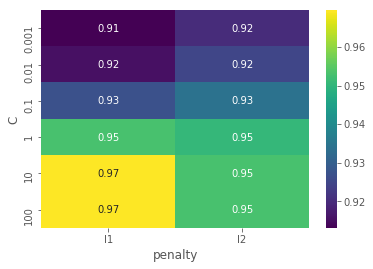

In [47]:
import pandas as pd
import numpy as np

scores = np.array(results.mean_test_score).reshape(6, 2)
sns.heatmap(scores, 
            cmap='viridis', 
            annot=True, 
            xticklabels=param_grid['penalty'], 
            yticklabels=param_grid['C'])

plt.xlabel('penalty')
plt.ylabel('C')
plt.show()

Each point in the heat map corresponds to one run of cross-validation, with a particular parameter setting. The color encodes the cross-validation accuracy, with light colors meaning high accuracy and dark colors meaning low accuracy. You can see that `SVC` is very sensitive to the setting of the parameters. For many of the parameter settings, the accuracy is around 92%, which is not that great. We can take away from this plot several things. First, the parameters we adjusted are very important for obtaining good performance. Both parameters (`C` and `gamma`) matter a lot, as adjusting them can change the accuracy from 91% to 97%. Additionally, the ranges we picked for the parameters may or may not be the ranges in which we see significant changes in the outcome. There are other possible combination of parameters which may have been missed out using the range you started with.

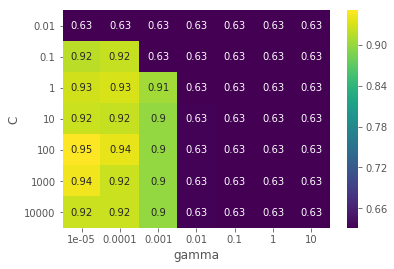

In [48]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000], 
              'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=1)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(len(param_grid['C']), 
                                                   len(param_grid['gamma']))
sns.heatmap(scores, cmap='viridis', annot=True, 
            xticklabels=param_grid['gamma'], 
            yticklabels=param_grid['C'])
plt.xlabel('gamma')
plt.ylabel('C')
plt.show()

**Discuss**: What have you observed?

**Q5**: In other algorithms (besides kernelized SVM with Gaussian RBF kernel), there may only be one hyperparameter in the model for tuning (such as `C` for linear SVM). In that case, think of what other experimental parameters that can be added to perform the two-parameter "2D" grid search. Also, why limit yourself to just two parameters? Possible to have three? Four? 

#### Nested Cross-Validation

In the preceding cases, we went from using a single split of the data into training,
validation, and test sets to splitting the data into training and test sets and then performing
cross-validation on the training set. But when using `GridSearchCV` as described earlier, we still have a single split of the data into training and test sets, which might make our results unstable and make us depend too much on this single
split of the data. We can go a step further, and instead of splitting the original data
into training and test sets only once, use multiple splits of cross-validation. This will result
in what is called *nested cross-validation*. In nested cross-validation, there is an outer
loop over splits of the data into training and test sets. For each of them, a grid search
is run (which might result in different best parameters for each split in the outer
loop). Then, for each outer split, the test set score using the best settings is reported.

**Caution**: As our `param_grid` contains 36 combinations of parameters, this results in a
lopping 36 \* 5 \* 5 = 900 models being built, making nested cross-validation a very
expensive procedure. Can your machine handle this?

In [49]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), cancer.data, cancer.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.92173913 0.93043478 0.98230088 0.96460177 0.94690265]
Mean cross-validation score:  0.9491958445555984


The result of this procedure is a list of scores—not a model, and not a parameter setting.
The scores tell us how well a model generalizes, given the best parameters found
by the grid. As it doesn’t provide a model that can be used on new data, nested crossvalidation
is rarely used when looking for a predictive model to apply to future data.
However, it can be useful for evaluating how well a given model works on a particular
dataset.

## Kaggle Leaf Classification Project

Get the Leaf classification dataset from the Kaggle playground: [https://www.kaggle.com/c/leaf-classification](https://www.kaggle.com/c/leaf-classification)

1. Try to perform regularization on your choice of algorithm for this classification task.
2. Try to use grid search with cross-validation to find the best parameters for your model.